# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [20]:
!pip install palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We need to dummify species, island, and sex.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [22]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

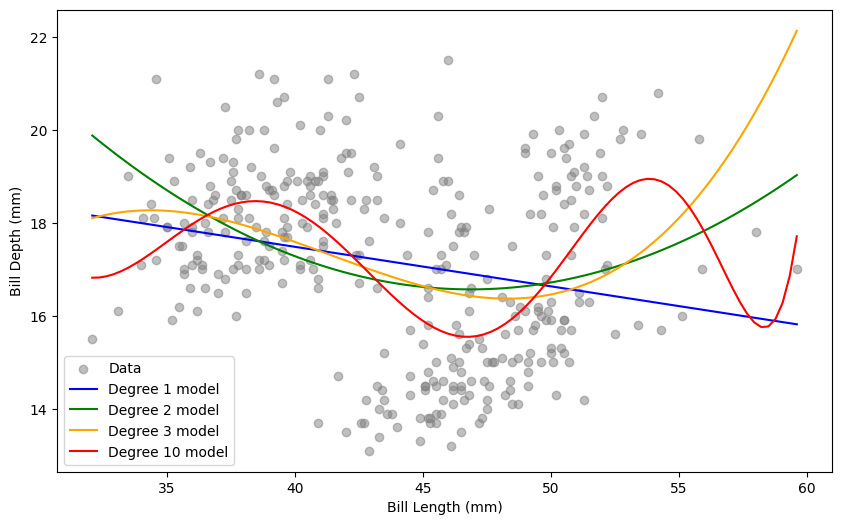

In [16]:
#used ChatGPT to help me play around with different functions to help with the final graph, found it very interesting!
#this function is for adding polynomial features
def add_polynomial_features(X, degree):
    X_poly = X.copy()
    for power in range(2, degree + 1):
        X_poly[f'bill_length_mm_{power}'] = X_poly['bill_length_mm'] ** power
    return X_poly

#this function is for fitting the polynomial model
def fit_polynomial_model(X, y, degree):
    X_poly = add_polynomial_features(X, degree)
    model = LinearRegression()
    model.fit(X_poly, y)
    return model, X_poly

#this function is for generating predictions for plotting
def show_polynomial_model(model, degree, X_range):
    X_range_poly = add_polynomial_features(pd.DataFrame(X_range, columns=['bill_length_mm']), degree)
    y_pred = model.predict(X_range_poly)
    return y_pred

#plotting original data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label="Data")

#defining the degrees of the polynomial models
degrees = [1, 2, 3, 10]
colors = ['blue', 'green', 'orange', 'red']

#used ChatGPT here too, could not figure out how to plot this correctly
X_range = np.linspace(X['bill_length_mm'].min(), X['bill_length_mm'].max(), 100).reshape(-1, 1)
for degree, color in zip(degrees, colors):
    model, X_poly = fit_polynomial_model(X, y, degree)
    y_pred = show_polynomial_model(model, degree, X_range)
    plt.plot(X_range, y_pred, label=f"Degree {degree} model", color=color)

plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend()
plt.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?

The Degree 1 model seems to be underfitting the data. The straight line doesn't reflect the actual trend in the scatterplot and only shows a slight negative line.

* Are any of the models above overfitting the data? If so, which ones and how can you tell?

The Degree 10 model seems to be overfitting the model. It's line is very wavy which is a sign of overfitting.

* Which of the above models do you think fits the data best and why?

I think the Degree 3 model fits the data best because it has two curves versus Degree 2 model's one curve, which in this case, I think more accurately shows the general trend of the scatterplot.  